In [32]:
import pandas as pd
import numpy as np
import sqlite3 as db
import matplotlib.pyplot as plt
from setuptools.command.rotate import rotate

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [27]:
connection = db.connect("../db.sqlite3")
cursor = connection.cursor()

query = """
SELECT 
    restaurant_product.name AS product_name,
    restaurant_product.price AS product_price,
    restaurant_order.datetime AS order_datetime,
    restaurant_orderitem.quantity AS quantity
FROM 
    restaurant_orderitem
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
JOIN 
    restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
"""
cursor.execute(query)
rows = cursor.fetchall()

connection.close()

df = pd.DataFrame(rows)
df.columns = ["Product name", "Product price", "Order time", "Quantity"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product name   74818 non-null  object 
 1   Product price  74818 non-null  float64
 2   Order time     74818 non-null  object 
 3   Quantity       74818 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

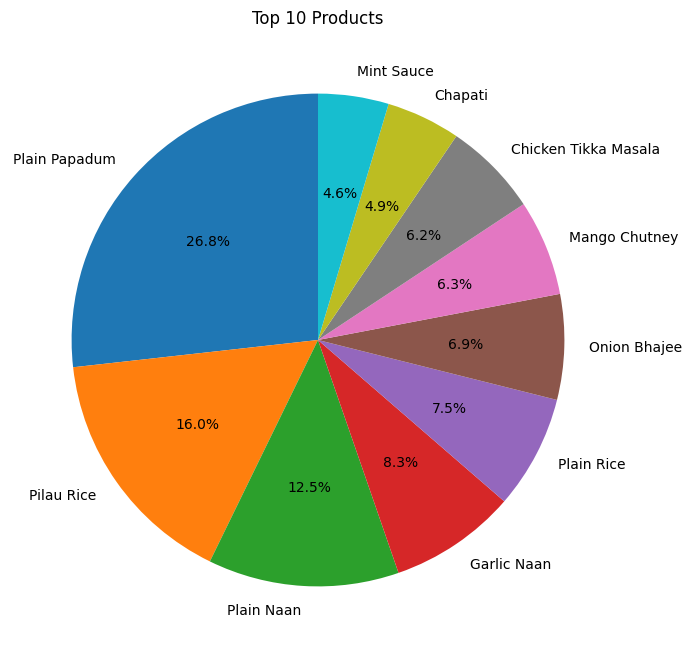

In [40]:
top_10_products = df.groupby("Product name")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
top_10_products.plot(kind="pie", autopct="%1.1f%%", startangle=90, labels=top_10_products.index)
plt.title("Top 10 Products")
plt.ylabel("")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

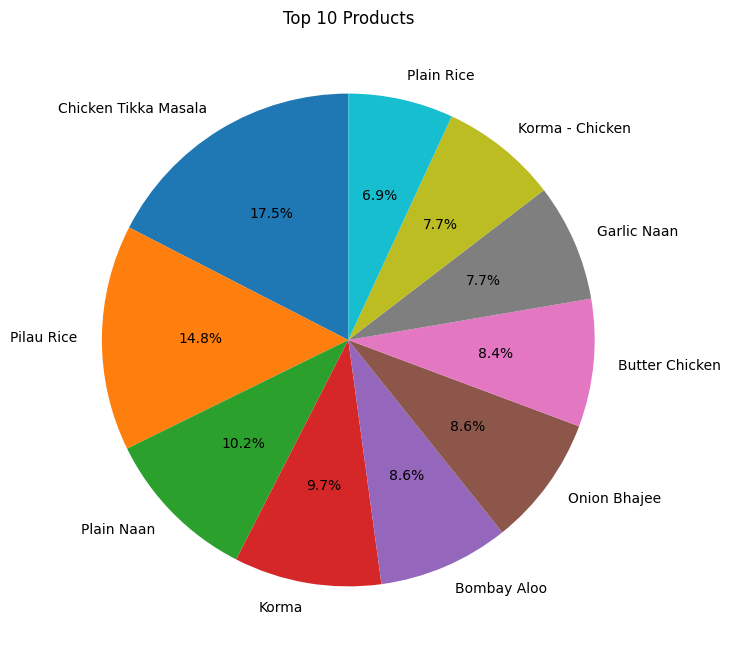

In [41]:
df["Item price"] = df["Product price"] * df["Quantity"]
top_10_by_income = df.groupby("Product name")["Item price"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
top_10_by_income.plot(kind="pie", autopct="%1.1f%%", startangle=90, labels=top_10_by_income.index)
plt.title("Top 10 Products")
plt.ylabel("")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

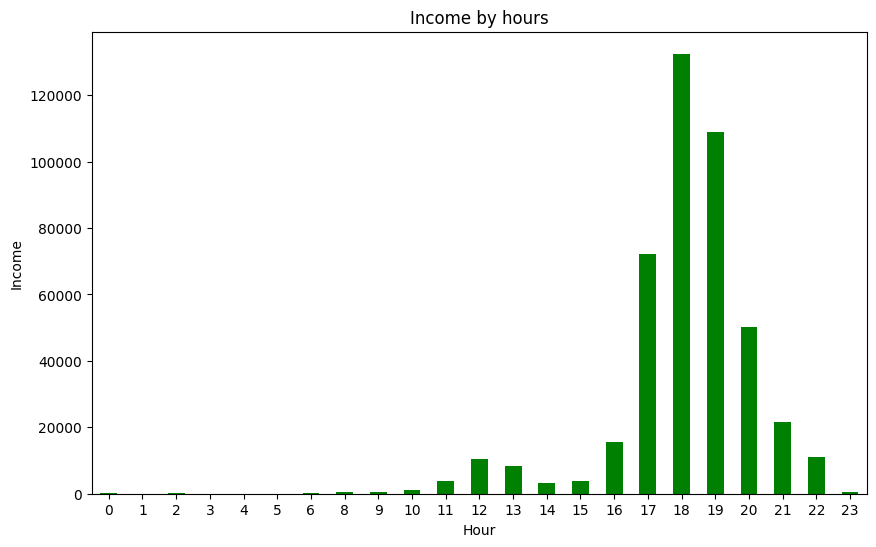

In [51]:
df["Order time"] = pd.to_datetime(df["Order time"])
df["Order Hour"] = df["Order time"].dt.hour
hourly_income = df.groupby("Order Hour")["Item price"].sum()
plt.figure(figsize=(10, 6))
hourly_income.plot(kind="bar", color="green")
plt.title("Income by hours")
plt.xlabel("Hour")
plt.ylabel("Income")
plt.xticks(rotation=0)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

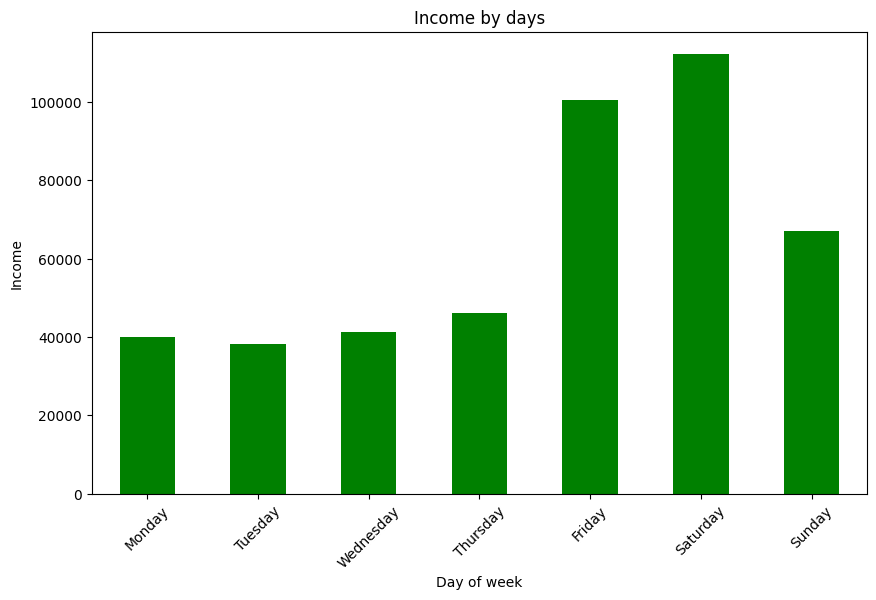

In [61]:
df["Order time"] = pd.to_datetime(df["Order time"])
df["Weekday"] = df["Order time"].dt.day_name()
daily_income = df.groupby("Weekday")["Item price"].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
daily_income.plot(kind="bar", color="green")
plt.title("Income by days")
plt.xlabel("Day of week")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.show()